In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregando o dataset Wine Quality da UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Separando as características (features) e as classes (quality)
X = data.drop("quality", axis=1)
y = data["quality"]

In [4]:
# Normalização das características usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Aplicando PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais para visualização
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Gerando gráficos
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Variância explicada por componente principal')

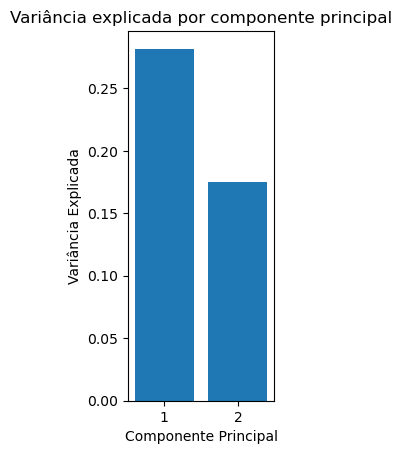

In [7]:
# Gráfico 1: Variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
plt.subplot(1, 3, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel("Componente Principal")
plt.ylabel("Variância Explicada")
plt.title("Variância explicada por componente principal")

Text(0.5, 1.0, 'Scatter Plot das Componentes Principais')

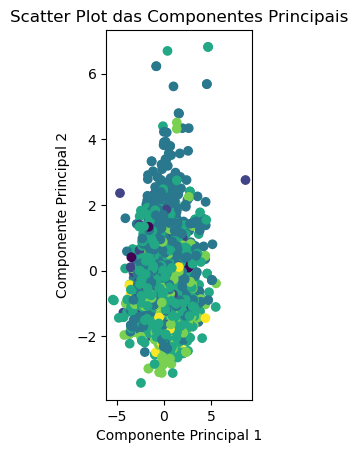

In [8]:
# Gráfico 2: Scatter plot das duas primeiras componentes principais
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Scatter Plot das Componentes Principais")

Text(0.5, 1.0, 'Boxplot da Qualidade do Vinho')

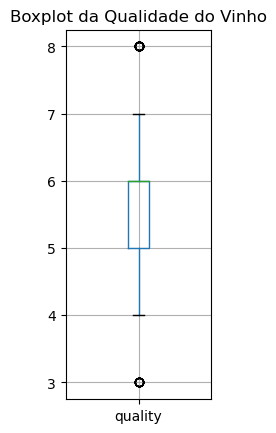

In [9]:
# Gráfico 3: Boxplot da qualidade do vinho
plt.subplot(1, 3, 3)
data.boxplot(column="quality")
plt.title("Boxplot da Qualidade do Vinho")